 # 1.Importer les packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn. svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# 2. Lecture du fichier

In [2]:
data = pd.read_csv('Mining_Dataset.csv')

# 3. Analyse des donées

In [3]:
data.head()

,N°,Site,Longitude,Latitude,Altitude,Ic,Classe_Ic
0,1,Tumbwe,27.398758,-11.479370,1356.0,1.032063,Dur
1,2,Tumbwe,27.398610,-11.478151,1354.0,27.390744,Dur
2,3,Tumbwe,27.399395,-11.476759,1354.0,1.541371,Dur
3,4,Tumbwe,27.399987,-11.475205,1354.0,1.081573,Dur
4,5,Tumbwe,27.400558,-11.474226,1353.0,1.364352,Dur


In [4]:
data.shape

(5247, 7)

In [5]:
data.isnull().sum()

N°           0
Site         0
Longitude    0
Latitude     0
Altitude     0
Ic           0
Classe_Ic    0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5247 entries, 0 to 5246
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   N°         5247 non-null   int64  
 1   Site       5247 non-null   object 
 2   Longitude  5247 non-null   float64
 3   Latitude   5247 non-null   float64
 4   Altitude   5247 non-null   float64
 5   Ic         5247 non-null   float64
 6   Classe_Ic  5247 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 287.1+ KB


In [7]:
data['Classe_Ic'].value_counts()

Classe_Ic
Dur        4080
Terne       628
Mi-dur      325
Liquide     201
Mou          10
Pateux        3
Name: count, dtype: int64

# 4. Prétraiment des données

In [8]:
# dropping passed values
classe_Dur = data[data['Classe_Ic'] == 'Dur'].iloc[ :625 , :]
classe_Dur 

,N°,Site,Longitude,Latitude,Altitude,Ic,Classe_Ic
0,1,Tumbwe,27.398758,-11.479370,1356.000,1.032063,Dur
1,2,Tumbwe,27.398610,-11.478151,1354.000,27.390744,Dur
2,3,Tumbwe,27.399395,-11.476759,1354.000,1.541371,Dur
3,4,Tumbwe,27.399987,-11.475205,1354.000,1.081573,Dur
4,5,Tumbwe,27.400558,-11.474226,1353.000,1.364352,Dur
...,...,...,...,...,...,...,...
808,809,Tumbwe,27.394227,-11.474065,1348.248,1.048759,Dur
810,811,Tumbwe,27.394278,-11.474105,1348.453,1.032063,Dur
811,812,Tumbwe,27.394311,-11.474129,1348.360,27.390744,Dur
812,813,Tumbwe,27.394341,-11.474153,1348.697,1.541371,Dur


In [9]:
classe_Terne = data[data['Classe_Ic'] == 'Terne']
classe_Terne

,N°,Site,Longitude,Latitude,Altitude,Ic,Classe_Ic
8,9,Tumbwe,27.395137,-11.473340,1352.000,0.715264,Terne
9,10,Tumbwe,27.394444,-11.474650,1350.000,0.653490,Terne
11,12,Tumbwe,27.393726,-11.475818,1344.000,0.559695,Terne
29,30,Tumbwe,27.388280,-11.471170,1342.000,0.669784,Terne
38,39,Tumbwe,27.390620,-11.474792,1338.417,0.715264,Terne
...,...,...,...,...,...,...,...
4685,4686,MUTSHATSHA,24.458400,-10.638600,1240.000,0.663000,Terne
4710,4711,QUARTIER MUSUMBA,27.446298,-11.695117,1204.000,0.720000,Terne
4713,4714,QUARTIER MUSUMBA,27.449804,-11.701423,1214.000,0.510000,Terne
4717,4718,QUARTIER MUSUMBA,27.462209,-11.706052,1205.000,0.710000,Terne


In [10]:
classe_Mi_Dur = data[data['Classe_Ic'] == 'Mi-dur']
classe_Mi_Dur

,N°,Site,Longitude,Latitude,Altitude,Ic,Classe_Ic
15,16,Tumbwe,27.390718,-11.474095,1341.000,0.757955,Mi-dur
27,28,Tumbwe,27.385035,-11.469725,1334.000,0.771537,Mi-dur
45,46,Tumbwe,27.390788,-11.474910,1338.771,0.757955,Mi-dur
57,58,Tumbwe,27.391128,-11.475153,1338.915,0.771537,Mi-dur
75,76,Tumbwe,27.391638,-11.475514,1338.924,0.757955,Mi-dur
...,...,...,...,...,...,...,...
4712,4713,QUARTIER MUSUMBA,27.444450,-11.698303,1222.000,0.960000,Mi-dur
4718,4719,QUARTIER MUSUMBA,27.467567,-11.711234,1202.000,0.770000,Mi-dur
4719,4720,QUARTIER MUSUMBA,27.461638,-11.710222,1206.000,0.950000,Mi-dur
4723,4724,QUARTIER MUSUMBA,27.453713,-11.706925,1196.000,0.950000,Mi-dur


In [11]:
classe_Liquide = data[data['Classe_Ic'] == 'Liquide']
classe_Liquide

,N°,Site,Longitude,Latitude,Altitude,Ic,Classe_Ic
20,21,Tumbwe,27.389360,-11.471787,1341.0000,-0.794529,Liquide
50,51,Tumbwe,27.390919,-11.475003,1338.5070,-0.794529,Liquide
80,81,Tumbwe,27.391808,-11.475637,1339.0120,-0.794529,Liquide
110,111,Tumbwe,27.392803,-11.476314,1340.4610,-0.794529,Liquide
140,141,Tumbwe,27.393934,-11.476886,1343.5050,-0.794529,Liquide
...,...,...,...,...,...,...,...
5193,5194,KINSEVERE,27.500284,-11.583934,1188.6369,-35.219849,Liquide
5203,5204,KINSEVERE,27.499655,-11.583269,1187.8608,-35.219849,Liquide
5213,5214,KINSEVERE,27.500588,-11.582730,1186.8692,-35.219849,Liquide
5223,5224,KINSEVERE,27.501601,-11.581927,1185.9133,-35.219849,Liquide


In [12]:
data_concat = pd.concat([classe_Dur, classe_Terne, classe_Mi_Dur, classe_Liquide])
data_concat

,N°,Site,Longitude,Latitude,Altitude,Ic,Classe_Ic
0,1,Tumbwe,27.398758,-11.479370,1356.0000,1.032063,Dur
1,2,Tumbwe,27.398610,-11.478151,1354.0000,27.390744,Dur
2,3,Tumbwe,27.399395,-11.476759,1354.0000,1.541371,Dur
3,4,Tumbwe,27.399987,-11.475205,1354.0000,1.081573,Dur
4,5,Tumbwe,27.400558,-11.474226,1353.0000,1.364352,Dur
...,...,...,...,...,...,...,...
5193,5194,KINSEVERE,27.500284,-11.583934,1188.6369,-35.219849,Liquide
5203,5204,KINSEVERE,27.499655,-11.583269,1187.8608,-35.219849,Liquide
5213,5214,KINSEVERE,27.500588,-11.582730,1186.8692,-35.219849,Liquide
5223,5224,KINSEVERE,27.501601,-11.581927,1185.9133,-35.219849,Liquide


In [13]:
data_concat['Classe_Ic'].unique()

array(['Dur', 'Terne', 'Mi-dur', 'Liquide'], dtype=object)

In [14]:
data_concat['Classe_Ic'].value_counts()

Classe_Ic
Terne      628
Dur        625
Mi-dur     325
Liquide    201
Name: count, dtype: int64

In [15]:
list_object = ['Site','Classe_Ic']
label_encoder = LabelEncoder()
for type in list_object:
    data_concat[type] = label_encoder.fit_transform(data_concat[type])

In [16]:
data_concat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1779 entries, 0 to 5233
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   N°         1779 non-null   int64  
 1   Site       1779 non-null   int64  
 2   Longitude  1779 non-null   float64
 3   Latitude   1779 non-null   float64
 4   Altitude   1779 non-null   float64
 5   Ic         1779 non-null   float64
 6   Classe_Ic  1779 non-null   int64  
dtypes: float64(4), int64(3)
memory usage: 111.2 KB


In [17]:
data_concat.head()

,N°,Site,Longitude,Latitude,Altitude,Ic,Classe_Ic
0,1,6,27.398758,-11.479370,1356.0,1.032063,0
1,2,6,27.398610,-11.478151,1354.0,27.390744,0
2,3,6,27.399395,-11.476759,1354.0,1.541371,0
3,4,6,27.399987,-11.475205,1354.0,1.081573,0
4,5,6,27.400558,-11.474226,1353.0,1.364352,0


In [18]:
data_concat.corr().Classe_Ic.sort_values(ascending =False)

Classe_Ic    1.000000
N°           0.519662
Latitude     0.040380
Site         0.030048
Longitude   -0.055790
Altitude    -0.093530
Ic          -0.145741
Name: Classe_Ic, dtype: float64

In [19]:
data_concat['Classe_Ic'].value_counts()

Classe_Ic
3    628
0    625
2    325
1    201
Name: count, dtype: int64

In [20]:
data_concat = data_concat.drop('N°', axis=1)
data_concat.head()

,Site,Longitude,Latitude,Altitude,Ic,Classe_Ic
0,6,27.398758,-11.479370,1356.0,1.032063,0
1,6,27.398610,-11.478151,1354.0,27.390744,0
2,6,27.399395,-11.476759,1354.0,1.541371,0
3,6,27.399987,-11.475205,1354.0,1.081573,0
4,6,27.400558,-11.474226,1353.0,1.364352,0


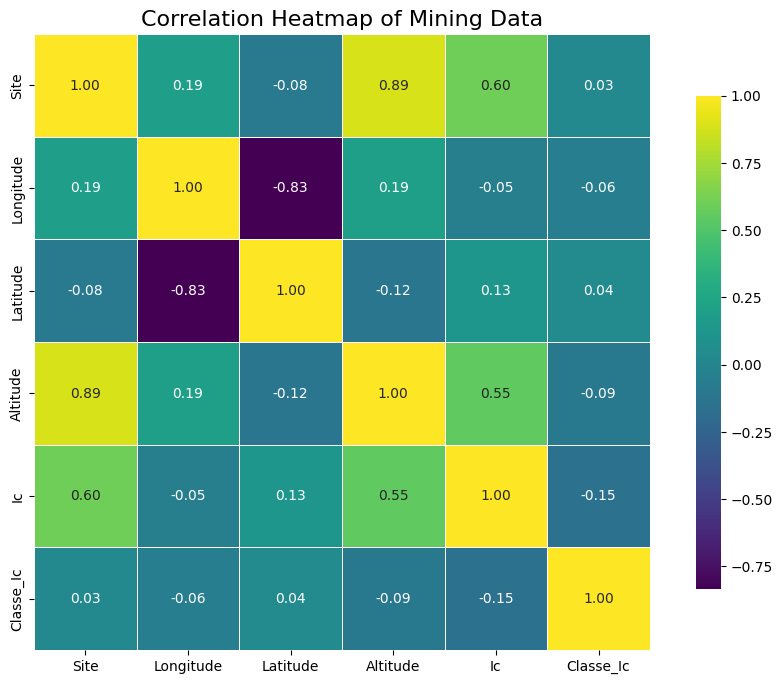

In [21]:
plt.figure(figsize=(12, 8))
sns.heatmap(
    data_concat.corr(),
    annot=True,               # Show correlation coefficients
    fmt=".2f",                # Format the annotations to 2 decimal places
    cmap='viridis',           # Choose a different color palette
    square=True,              # Make cells square-shaped
    linewidths=0.5,          # Add lines between cells
    cbar_kws={"shrink": .8}, # Shrink the color bar
)
plt.title('Correlation Heatmap of Mining Data', fontsize=16)
plt.show()

# 5. Division des données

In [22]:
X = data_concat.iloc [:, :-1]
y = data_concat.iloc[:, -1]
y_ = to_categorical(y, num_classes=4)

In [23]:
scaler = StandardScaler()

X_normal = scaler.fit_transform(X)
#X_test = scaler.transform(X_test)

In [24]:
print(X.shape)
print(y_.shape)

(1779, 5)
(1779, 4)


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_normal, y_, test_size=0.25, random_state=27)

In [26]:
print("X-train:", X_train.shape)
print("y-train:", y_train.shape)
print("X-test:", X_test.shape)
print("y-test:", y_test.shape)

X-train: (1334, 5)
y-train: (1334, 4)
X-test: (445, 5)
y-test: (445, 4)


<Axes: >

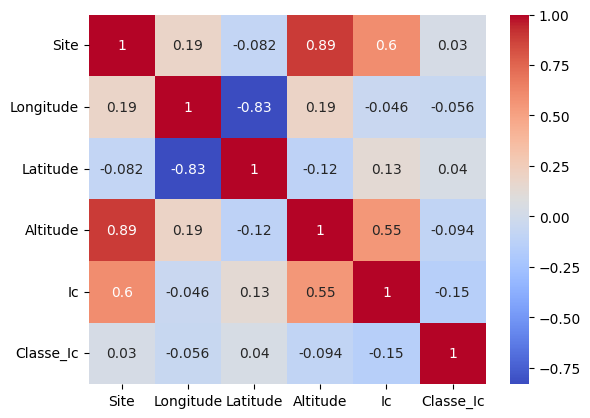

In [27]:
import seaborn as sns
sns.heatmap(data_concat.corr(), annot =True, cmap='coolwarm')

# 6. Construction du ShallowNeural Network

In [28]:
# Creer une instance de la Classe Sequential
model_dnn = Sequential()

In [29]:
# Ajout de la premiere couche
model_dnn.add(Dense(10, input_shape=(5,), activation='relu'))

# Ajout de la deuxieme couche intermediaire
model_dnn.add(Dense(128, activation='relu'))
model_dnn.add(Dropout(0.5))

# Ajout de la troisieme couche intermediaire
model_dnn.add(Dense(64, activation='relu'))
model_dnn.add(Dropout(0.2))

# Ajout de la qautriem couche intermediaire
model_dnn.add(Dense(32, activation='relu'))

# Ajout de la couche de Sortie
model_dnn.add(Dense(4, activation='softmax'))

# Compiler le model
model_dnn.compile(optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

# Affichage de l'architecture du reseau de neurone
model_dnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,936 (46.62 KB)

 Trainable params: 11,936 (46.62 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
history = model_dnn.fit(X_train, y_train, epochs=150, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/150
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4638 - loss: 1.2410 - val_accuracy: 0.6404 - val_loss: 0.8832
Epoch 2/150
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6933 - loss: 0.7876 - val_accuracy: 0.8225 - val_loss: 0.4582
Epoch 3/150
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7985 - loss: 0.4801 - val_accuracy: 0.9101 - val_loss: 0.2809
Epoch 4/150
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8334 - loss: 0.3766 - val_accuracy: 0.8562 - val_loss: 0.2495
Epoch 5/150
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8499 - loss: 0.3119 - val_accuracy: 0.9079 - val_loss: 0.1978
Epoch 6/150
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8969 - loss: 0.2373 - val_accuracy: 0.9865 - val_loss: 0.1140
Epoch 7/150
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9266 - loss: 0.1871 - val_accuracy: 0.8674 - val_loss: 0.2625
Epoch 8/150
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9151 - loss: 0.2187 - val_accuracy: 0.9191 - 

# 6. Utilisation de 5 algorithmes de machine learning

In [31]:
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_normal, y, test_size=0.25, random_state=27)

In [32]:
model_forest = RandomForestClassifier()

In [33]:
model_forest.fit(X_train_, y_train_)
y_pred = model_forest.predict(X_test_)
print(accuracy_score(y_test_, y_pred))

0.9977528089887641


In [34]:
model_SVC = SVC()

In [35]:
model_SVC.fit(X_train_, y_train_)
y_pred = model_SVC.predict(X_test_)
print(accuracy_score(y_test_, y_pred))

0.7078651685393258


In [36]:
model_Decision = DecisionTreeClassifier()

In [37]:
model_Decision.fit(X_train_, y_train_)
y_pred = model_Decision.predict(X_test_)
print(accuracy_score(y_test_, y_pred))

1.0


In [38]:
model_neighbors = KNeighborsClassifier()

In [39]:
model_neighbors.fit(X_train_, y_train_)
y_pred = model_neighbors.predict(X_test_)
print(accuracy_score(y_test_, y_pred))

0.8786516853932584


In [40]:
model_logistic = LogisticRegression()

In [41]:
model_logistic.fit(X_train_, y_train_)
y_pred = model_logistic.predict(X_test_)
print(accuracy_score(y_test_, y_pred))

0.7258426966292135


# 7. Visualisation de  l’evolution de l’entrainement du réseau de neurone

In [42]:
epoch_accuracy = history.history['accuracy']
epoch_loss = history.history['loss']

epoch_val_accuracy = history.history['val_accuracy']
epoch_val_loss = history.history['val_loss']

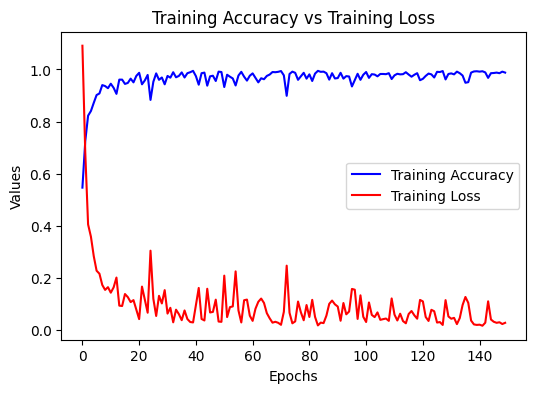

In [43]:
plt.figure(figsize=(6, 4))
plt.plot(range(0, len(epoch_accuracy)), epoch_accuracy, color='blue', label='Training Accuracy')
plt.plot(range(0, len(epoch_loss)), epoch_loss, color='red', label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Values')
plt.title('Training Accuracy vs Training Loss')
plt.legend()
plt.show()

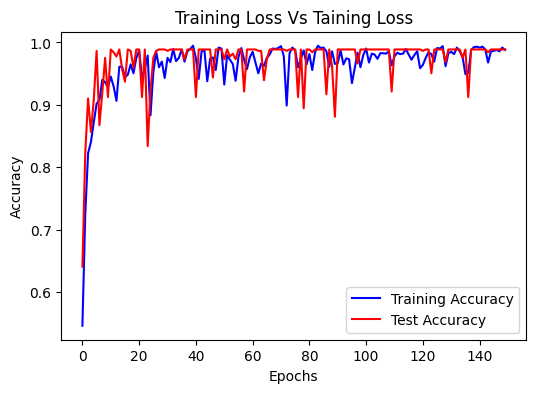

In [44]:
plt.figure(figsize=(6, 4))
plt.plot(range(0, len(epoch_accuracy)), epoch_accuracy, color='blue', label='Training Accuracy')
plt.plot(range(0, len(epoch_val_accuracy)), epoch_val_accuracy, color='red', label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Loss Vs Taining Loss')
plt.legend()
plt.show()

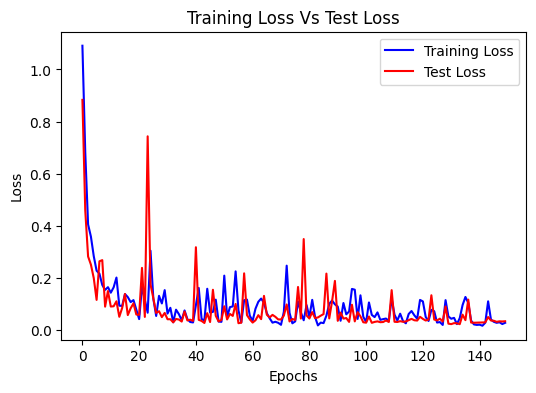

In [45]:
plt.figure(figsize=(6, 4))
plt.plot(range(0, len(epoch_loss)), epoch_loss, color='blue', label='Training Loss')
plt.plot(range(0, len(epoch_val_loss)), epoch_val_loss, color='red', label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Vs Test Loss')
plt.legend()
plt.show()

# 8. Evaluer le modèle

In [46]:
model_dnn.evaluate(X_test, y_test)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9871 - loss: 0.0416     


[0.031923312693834305, 0.9887640476226807]

# 9. Simple prédiction

In [47]:
predictions = model_dnn.predict(X_test)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [48]:
#predicted_classes
predicted_classes = predictions.argmax(axis=1)

print("Prédictions :", predicted_classes)

Prédictions : [2 3 0 2 3 1 3 3 2 2 0 0 3 2 2 0 3 0 0 3 3 3 0 1 3 0 3 2 0 0 0 0 3 3 1 3 2
 0 2 2 0 2 0 0 0 3 0 2 0 3 3 2 0 3 2 2 2 2 0 3 0 2 2 2 0 1 3 2 2 0 0 3 2 0
 3 0 3 0 2 3 0 0 2 3 0 0 2 3 3 3 0 0 0 2 3 0 1 1 3 2 0 3 3 1 3 1 3 0 3 1 2
 0 3 0 3 3 1 0 3 3 0 0 2 3 0 0 0 3 0 0 3 3 3 0 1 3 3 3 0 0 0 1 0 0 3 0 0 0
 0 1 0 1 2 1 0 3 0 0 0 0 1 0 3 1 0 0 3 3 1 3 0 3 0 0 3 0 0 1 0 3 0 0 3 0 0
 3 3 1 3 3 0 3 3 3 0 2 0 0 0 0 3 3 3 3 3 0 3 2 0 3 3 2 0 0 0 3 3 0 3 2 0 3
 2 0 0 0 2 3 0 1 3 0 1 2 1 3 0 2 0 2 0 3 0 2 0 3 2 2 0 3 0 2 0 0 3 3 0 0 0
 3 2 0 3 3 3 2 2 3 2 3 1 0 0 0 0 1 0 0 0 2 0 2 2 3 2 3 0 1 0 3 2 0 3 0 2 2
 1 0 0 2 0 3 2 2 2 0 0 0 0 1 2 0 2 0 1 3 1 1 2 3 3 0 1 3 0 0 0 0 3 0 0 2 3
 3 0 1 3 3 3 1 0 0 3 2 2 3 1 1 0 2 2 0 3 2 2 2 3 0 0 0 3 3 0 1 3 3 0 2 0 3
 0 3 1 3 0 2 0 3 1 2 0 3 3 0 3 0 3 2 0 0 3 3 0 3 3 1 0 0 2 3 0 0 0 2 1 3 3
 0 2 0 3 0 0 1 3 0 2 3 3 1 0 1 3 3 2 1 0 2 3 1 3 0 1 2 0 3 1 2 1 3 0 0 0 0
 2]


In [49]:
# Donnée d'entrée (5 features)
X_test_2 = np.array([[2,	27.502679,	-11.581215,	1183.3166,	-35.219849	]])
#X_test_2 = np.array([[10, 27.398758, -11.479370, 1356.0, 1.03206]])


# N'oublie pas de scaler aussi cette entrée
X_test_2 = scaler.transform(X_test_2)
print(X_test_2)

# Prédiction
prediction = model_dnn.predict(X_test_2)
predicted_class = prediction.argmax()

print("Classe prédite :", predicted_class)

[[-5.58584463  0.56992661 -1.32603792 -4.99967674 -4.25034463]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Classe prédite : 1


In [50]:
# Affichage des résultats
probs_percent = prediction[0]
#probs_percent = prediction[0] * 100
probs_rounded = np.round(probs_percent, 2)

print(f"Classe prédite : {predicted_class}")
print("Probabilités par classe (%):", probs_rounded)

Classe prédite : 1
Probabilités par classe (%): [0. 1. 0. 0.]


# 10. Sauvegarde du modèle 

In [51]:
model_dnn.save('model_dnn.h5')

In [52]:
joblib.dump(scaler, "scaler_ic.pkl")

['scaler_ic.pkl']